## **TAREA 4: Análisis de Estimaciones de Pobreza Comunal en Chile - 2022**

**Autores:** Simón Ramirez - Victor Saldivia - Carlos Saquel  
**Asignatura:** Visualización de la Información

Este análisis tiene como objetivo explorar las estimaciones de pobreza por ingresos y pobreza multidimensional en las comunas de Chile durante el año 2022. Los datos fueron obtenidos a partir de los conjuntos de datos proporcionados por el Ministerio de Desarrollo Social y Familia de Chile a través del Ministerio de Desarrollo Social y Familia. Se presenta un análisis descriptivo y visualizaciones para comprender de mejor forma las correlaciones y características de la pobreza en las comunas del país.

### **IMPORTACIÓN DE LIBRERÍAS**

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.patches as patches
from matplotlib import lines
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from matplotlib.collections import PathCollection
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import PercentFormatter, MultipleLocator
import matplotlib.gridspec as gridspec
import geopandas as gpd

from mpl_toolkits.axisartist.grid_finder import DictFormatter
import mpl_toolkits.axisartist.floating_axes as floating_axes

import matplotlib.font_manager as fm

import warnings
warnings.filterwarnings("ignore")

### **CARGA DEL DATASET**
El archivo que vamos a utilizar contiene información sobre las estimaciones de pobreza en Chile para el año 2022, tanto de ingresos como multidimensional. 


In [2]:
file_path_1 = './data/Estimaciones_Indice_Pobreza_Multidimensional_Comunas_2022.xlsx'
file_path_2 = './data/Estimaciones_Tasa_Pobreza_Ingresos_Comunas_2022.xlsx'

In [3]:
# Leer ambos archivos
df_pobreza_ingresos = pd.read_excel(file_path_1)
df_pobreza_multidimensional = pd.read_excel(file_path_2)

### **FUNCIONES DE LIMPIEZA DE LOS DATOS**


In [4]:
# Funciones de limpieza de columnas y acentos
def accent_replace(col):
    reemplazos = {
        'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u',
        'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U',
    }
    for acento, sin_acento in reemplazos.items():
        col = col.replace(acento, sin_acento)
    return col

def columns_clean(columnas):
    columnas_limpias = []
    for col in columnas:
        col = accent_replace(col).lower().replace('\n', '')
        col = re.sub(r'\(.*?\)', '', col).replace('*', '').replace(' ', '_')
        col = re.sub(r'[^a-z0-9_]', '', col).rstrip('_')
        columnas_limpias.append(col)
    return columnas_limpias

def get_clean_data(file, get_rows):
    df = pd.read_excel(file, skiprows=get_rows[0])
    df = df.iloc[:get_rows[1]]
    df.columns = columns_clean(df.columns)
    return df

 #### **LIMPIEZA, CARGA Y AJUSTES DE COLUMNAS DEL DATASET DE POBREZA POR INGRESOS**

In [5]:
df_1 = get_clean_data(file='./data/Estimaciones_Tasa_Pobreza_Ingresos_Comunas_2022.xlsx', get_rows=[2, 345])
df_1.columns = ['codigo', 'region', 'comuna', 'poblacion', 'personas_pobreza_por_ingresos', 'porcentaje_pobreza_por_ingresos_2022',
                'limite_inferior_ingreso', 'limite_superior_ingreso', 'presencia_comuna_casen', 'tipo_de_estimacion_sae']
df_1.head()

,codigo,region,comuna,poblacion,personas_pobreza_por_ingresos,porcentaje_pobreza_por_ingresos_2022,limite_inferior_ingreso,limite_superior_ingreso,presencia_comuna_casen,tipo_de_estimacion_sae
0,1101,Tarapacá,Iquique,229674.0,18122.0,0.078904,0.064903,0.092905,Sí,Directa y Sintética (Fay-Herriot)
1,1107,Tarapacá,Alto Hospicio,138527.0,21144.0,0.152634,0.137397,0.167872,Sí,Directa y Sintética (Fay-Herriot)
2,1401,Tarapacá,Pozo Almonte,18290.0,2805.0,0.153344,0.115596,0.191092,Sí,Directa y Sintética (Fay-Herriot)
3,1402,Tarapacá,Camiña,1380.0,332.0,0.240365,0.161336,0.319394,Sí,Sintética
4,1403,Tarapacá,Colchane,1575.0,350.0,0.222535,0.147399,0.297672,Sí,Sintética


### **ANÁLISIS DESCRIPTIVO DE LOS DATOS**

In [6]:
df_1.describe(include='all')

,codigo,region,comuna,poblacion,personas_pobreza_por_ingresos,porcentaje_pobreza_por_ingresos_2022,limite_inferior_ingreso,limite_superior_ingreso,presencia_comuna_casen,tipo_de_estimacion_sae
count,345.0,345,345,345.000000,345.000000,345.000000,345.000000,345.000000,345,345
unique,345.0,16,345,NaN,NaN,NaN,NaN,NaN,2,2
top,1101.0,Metropolitana,Iquique,NaN,NaN,NaN,NaN,NaN,Sí,Directa y Sintética (Fay-Herriot)
freq,1.0,52,1,NaN,NaN,NaN,NaN,NaN,335,246
mean,NaN,NaN,NaN,57618.115942,3748.527536,0.090339,0.051886,0.129155,NaN,NaN
std,NaN,NaN,NaN,91321.953828,5168.776092,0.043544,0.034849,0.054402,NaN,NaN
min,NaN,NaN,NaN,207.000000,6.000000,0.008747,0.000000,0.021982,NaN,NaN
25%,NaN,NaN,NaN,9959.000000,985.000000,0.059865,0.026897,0.092199,NaN,NaN
50%,NaN,NaN,NaN,20525.000000,1863.000000,0.085873,0.047585,0.123562,NaN,NaN
75%,NaN,NaN,NaN,56542.000000,3888.000000,0.115698,0.070589,0.163677,NaN,NaN


#### Información General del Dataset


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   codigo                                345 non-null    object 
 1   region                                345 non-null    object 
 2   comuna                                345 non-null    object 
 3   poblacion                             345 non-null    float64
 4   personas_pobreza_por_ingresos         345 non-null    float64
 5   porcentaje_pobreza_por_ingresos_2022  345 non-null    float64
 6   limite_inferior_ingreso               345 non-null    float64
 7   limite_superior_ingreso               345 non-null    float64
 8   presencia_comuna_casen                345 non-null    object 
 9   tipo_de_estimacion_sae                345 non-null    object 
dtypes: float64(5), object(5)
memory usage: 27.1+ KB


 #### **LIMPIEZA, CARGA Y AJUSTES DE COLUMNAS DEL DATASET DE POBREZA MULTIDIMENSIONAL**

In [8]:
df_2 = get_clean_data(file='./data/Estimaciones_Indice_Pobreza_Multidimensional_Comunas_2022.xlsx', get_rows=[2, 345])
df_2.columns = ['codigo', 'region', 'comuna', 'poblacion', 'personas_pobreza_multidimensional', 'porcentaje_pobreza_multidimensional_2022',
                'limite_inferior_multidimensional', 'limite_superior_multidimensional', 'presencia_comuna_casen', 'tipo_de_estimacion_sae']
df_2.head(10)

,codigo,region,comuna,poblacion,personas_pobreza_multidimensional,porcentaje_pobreza_multidimensional_2022,limite_inferior_multidimensional,limite_superior_multidimensional,presencia_comuna_casen,tipo_de_estimacion_sae
0,1101,Tarapacá,Iquique,229674.0,41966.566241,0.182722,0.162429,0.203015,Sí,Directa y Sintética (Fay-Herriot)
1,1107,Tarapacá,Alto Hospicio,138527.0,45162.442981,0.326019,0.294776,0.357263,Sí,Directa y Sintética (Fay-Herriot)
2,1401,Tarapacá,Pozo Almonte,18290.0,4563.395313,0.249502,0.199334,0.299671,Sí,Directa y Sintética (Fay-Herriot)
3,1402,Tarapacá,Camiña,1380.0,307.626999,0.222918,0.137766,0.308071,Sí,Sintética
4,1403,Tarapacá,Colchane,1575.0,472.752772,0.300160,0.187495,0.412826,Sí,Sintética
5,1404,Tarapacá,Huara,3072.0,1184.719019,0.385651,0.318693,0.452609,Sí,Directa y Sintética (Fay-Herriot)
6,1405,Tarapacá,Pica,6184.0,1040.267243,0.168219,0.119494,0.216945,Sí,Directa y Sintética (Fay-Herriot)
7,2101,Antofagasta,Antofagasta,438942.0,73102.886971,0.166543,0.140852,0.192234,Sí,Directa y Sintética (Fay-Herriot)
8,2102,Antofagasta,Mejillones,15502.0,3077.761164,0.198540,0.126538,0.270541,Sí,Directa y Sintética (Fay-Herriot)
9,2103,Antofagasta,Sierra Gorda,1790.0,294.946135,0.164774,0.074272,0.255277,Sí,Sintética


In [9]:
df_2.describe(include='all')

,codigo,region,comuna,poblacion,personas_pobreza_multidimensional,porcentaje_pobreza_multidimensional_2022,limite_inferior_multidimensional,limite_superior_multidimensional,presencia_comuna_casen,tipo_de_estimacion_sae
count,345.0,345,345,345.000000,345.000000,345.000000,345.000000,345.000000,345,345
unique,345.0,16,345,NaN,NaN,NaN,NaN,NaN,2,2
top,1101.0,Metropolitana,Iquique,NaN,NaN,NaN,NaN,NaN,Sí,Directa y Sintética (Fay-Herriot)
freq,1.0,52,1,NaN,NaN,NaN,NaN,NaN,335,298
mean,NaN,NaN,NaN,57618.115942,9763.030150,0.194504,0.138041,0.251170,NaN,NaN
std,NaN,NaN,NaN,91321.953828,15099.360264,0.070852,0.060731,0.083519,NaN,NaN
min,NaN,NaN,NaN,207.000000,0.234564,0.001133,0.000000,0.014602,NaN,NaN
25%,NaN,NaN,NaN,9959.000000,2051.968205,0.152218,0.105272,0.200601,NaN,NaN
50%,NaN,NaN,NaN,20525.000000,4087.274968,0.188434,0.130985,0.244170,NaN,NaN
75%,NaN,NaN,NaN,56542.000000,9050.029870,0.228287,0.165782,0.294340,NaN,NaN


#### Información General del Dataset

In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   codigo                                    345 non-null    object 
 1   region                                    345 non-null    object 
 2   comuna                                    345 non-null    object 
 3   poblacion                                 345 non-null    float64
 4   personas_pobreza_multidimensional         345 non-null    float64
 5   porcentaje_pobreza_multidimensional_2022  345 non-null    float64
 6   limite_inferior_multidimensional          345 non-null    float64
 7   limite_superior_multidimensional          345 non-null    float64
 8   presencia_comuna_casen                    345 non-null    object 
 9   tipo_de_estimacion_sae                    345 non-null    object 
dtypes: float64(5), object(5)
memory usage:

### **COMBINACIÓN DE DATASETS**

In [11]:
df_merge = df_1.merge(df_2[['codigo', 'porcentaje_pobreza_multidimensional_2022', 'limite_inferior_multidimensional', 'limite_superior_multidimensional']], on='codigo')

df_merge

,codigo,region,comuna,poblacion,personas_pobreza_por_ingresos,porcentaje_pobreza_por_ingresos_2022,limite_inferior_ingreso,limite_superior_ingreso,presencia_comuna_casen,tipo_de_estimacion_sae,porcentaje_pobreza_multidimensional_2022,limite_inferior_multidimensional,limite_superior_multidimensional
0,1101,Tarapacá,Iquique,229674.0,18122.0,0.078904,0.064903,0.092905,Sí,Directa y Sintética (Fay-Herriot),0.182722,0.162429,0.203015
1,1107,Tarapacá,Alto Hospicio,138527.0,21144.0,0.152634,0.137397,0.167872,Sí,Directa y Sintética (Fay-Herriot),0.326019,0.294776,0.357263
2,1401,Tarapacá,Pozo Almonte,18290.0,2805.0,0.153344,0.115596,0.191092,Sí,Directa y Sintética (Fay-Herriot),0.249502,0.199334,0.299671
3,1402,Tarapacá,Camiña,1380.0,332.0,0.240365,0.161336,0.319394,Sí,Sintética,0.222918,0.137766,0.308071
4,1403,Tarapacá,Colchane,1575.0,350.0,0.222535,0.147399,0.297672,Sí,Sintética,0.300160,0.187495,0.412826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,16301,Ñuble,San Carlos,56782.0,7775.0,0.136924,0.103947,0.169902,Sí,Directa y Sintética (Fay-Herriot),0.150668,0.115009,0.186328
341,16302,Ñuble,Coihueco,28817.0,3887.0,0.134886,0.092175,0.177596,Sí,Directa y Sintética (Fay-Herriot),0.244921,0.189552,0.300291
342,16303,Ñuble,Ñiquén,11543.0,1598.0,0.138420,0.090545,0.186295,Sí,Directa y Sintética (Fay-Herriot),0.191601,0.117715,0.265486
343,16304,Ñuble,San Fabián,4738.0,709.0,0.149570,0.100026,0.199115,Sí,Directa y Sintética (Fay-Herriot),0.150340,0.079146,0.221533


### **VISUALIZACIÓN DE CORRELACIONES**

In [12]:
# Colores
############################################################################################
def mod_color_op(color, intensidad=1., alpha=1.):
    return (color[0] * intensidad, color[1] * intensidad, color[2] * intensidad, alpha)

col_yellow = (224,177,101,255)
col_green = (0,150,158,255)
col_salmon = (221,109,109,255)
col_wine = (155,97,128,255)
col_black = (3,2,8,255)
col_white = (225,232,234,255)
col_gray_text = (58,84,95,255)
col_gray = (170,190,199,255)
col_gray_dark = (108,135,147,255)

colorSalmon = tuple([i/255 for i in col_salmon])
colorYellow = tuple([i/255 for i in col_yellow])
colorYellow = mod_color_op(colorYellow, intensidad=0.93, alpha=1.)
colorGreen = tuple([i/255 for i in col_green])

colorBlack = tuple([i/255 for i in col_black])
colorWhite= tuple([i/255 for i in col_white])
colorGrayText = tuple([i/255 for i in col_gray_text])
colorGray = tuple([i/255 for i in col_gray])
colorGrayDark = tuple([i/255 for i in col_gray_dark])

color_region = {'Metropolitana': colorGreen, 'Valparaíso': colorSalmon, 'Biobío': colorYellow}


# Fuentes
############################################################################################
font_path_latoBlack = 'Lato/Lato-Black.ttf' 
font_path_latoB = 'Lato/Lato-Bold.ttf' 
font_path_latoR = 'Lato/Lato-Regular.ttf'
font_path_latoI = 'Lato/Lato-Italic.ttf'
font_path_noto2 = 'Noto_Sans_Symbols_2/NotoSansSymbols2-Regular.ttf'

prop_latoBlack = fm.FontProperties(fname=font_path_latoBlack)
prop_latoB = fm.FontProperties(fname=font_path_latoB)
prop_latoR = fm.FontProperties(fname=font_path_latoR)
prop_latoI = fm.FontProperties(fname=font_path_latoI)
prop_noto2 = fm.FontProperties(fname=font_path_noto2)

# Colores 
col_black = (3,2,8,255)
col_white = (225,232,234,255)
col_gray_text = (58,84,95,255)
col_gray = (170,190,199,255)
col_gray_dark = (108,135,147,255)

colorBlack = tuple([i/255 for i in col_black])
colorWhite= tuple([i/255 for i in col_white])
colorGrayText = tuple([i/255 for i in col_gray_text])
colorGray = tuple([i/255 for i in col_gray])
colorGrayDark = tuple([i/255 for i in col_gray_dark])

In [157]:
def title1_fig(fig, posx_line_title, posy_line_title, color_text, color_line, text,
            lw_line_title, pos_x0_title, pos_y0_title, fontsize=14, fontproperties=prop_latoBlack, linespacing=1):
    fig.add_artist(
        lines.Line2D(posx_line_title, posy_line_title, lw=lw_line_title, 
                    color=color_line, solid_capstyle="butt", 
                    transform=fig.transFigure))
    fig.text(pos_x0_title, pos_y0_title, text,
            ha='left', va='top', fontsize=fontsize, weight=700, 
            color=color_text, fontproperties=fontproperties, linespacing=linespacing)

def error_bar_draw(fig, pos, df_merge):
    mean_pais = df_merge['personas_pobreza_por_ingresos'].sum() / df_merge['poblacion'].sum()
    region_x = {}
    for r in df_merge.sort_values('num_region', ascending=True)['region'].unique():
        mean_region = df_merge[df_merge['region']==r]['personas_pobreza_por_ingresos'].sum() / df_merge[df_merge['region']==r]['poblacion'].sum()
        region_x[r] = mean_pais - mean_region

    errorbar_ax = fig.add_axes(pos)
    errorbar_ax.barh(y=region_x.keys(), width=region_x.values(), height=0.9, color=[colorSalmon if k<0 else colorGreen for k in region_x.values()], alpha=0.8, zorder=2)
    errorbar_ax.spines['top'].set_visible(False)
    errorbar_ax.spines['right'].set_visible(False)
    errorbar_ax.spines['left'].set_visible(False)
    errorbar_ax.spines['bottom'].set_color(colorGrayText)
    errorbar_ax.spines['bottom'].set_linewidth(0.5)

    errorbar_ax.tick_params(axis='y', direction='out', length=0, width=0.5, colors=colorGrayText, grid_color=colorGray, grid_alpha=0)
    errorbar_ax.tick_params(axis='x', direction='out', length=3, width=0.5, colors=colorGrayText, grid_color=colorGray, grid_alpha=0)

    errorbar_ax.axvline(0, color=colorGrayText, linewidth=0.5, zorder=1)
    errorbar_ax.text(0,16,f"Porcentaje nacional de\npobreza por ingresos\n{np.round(mean_pais*100,1)}%", ha='center', va='bottom', 
            color=colorGrayText, fontproperties=prop_latoR, fontsize=10, linespacing=1.3)
    errorbar_ax.set_ylim([-0.7, 15.7])

    errorbar_ax.set_xticks([-0.055, -0.05, -0.04, -0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03, 0.035])
    errorbar_ax.set_xticklabels(["", "-5%", "-4%", "-3%", "-2%", "-1%", "0%", "1%", "2%", "3%", ""], color=colorGrayText, fontproperties=prop_latoR, fontsize=8)
    errorbar_ax.set_yticklabels(region_x.keys(), color=colorGrayText, fontproperties=prop_latoR, fontsize=10)

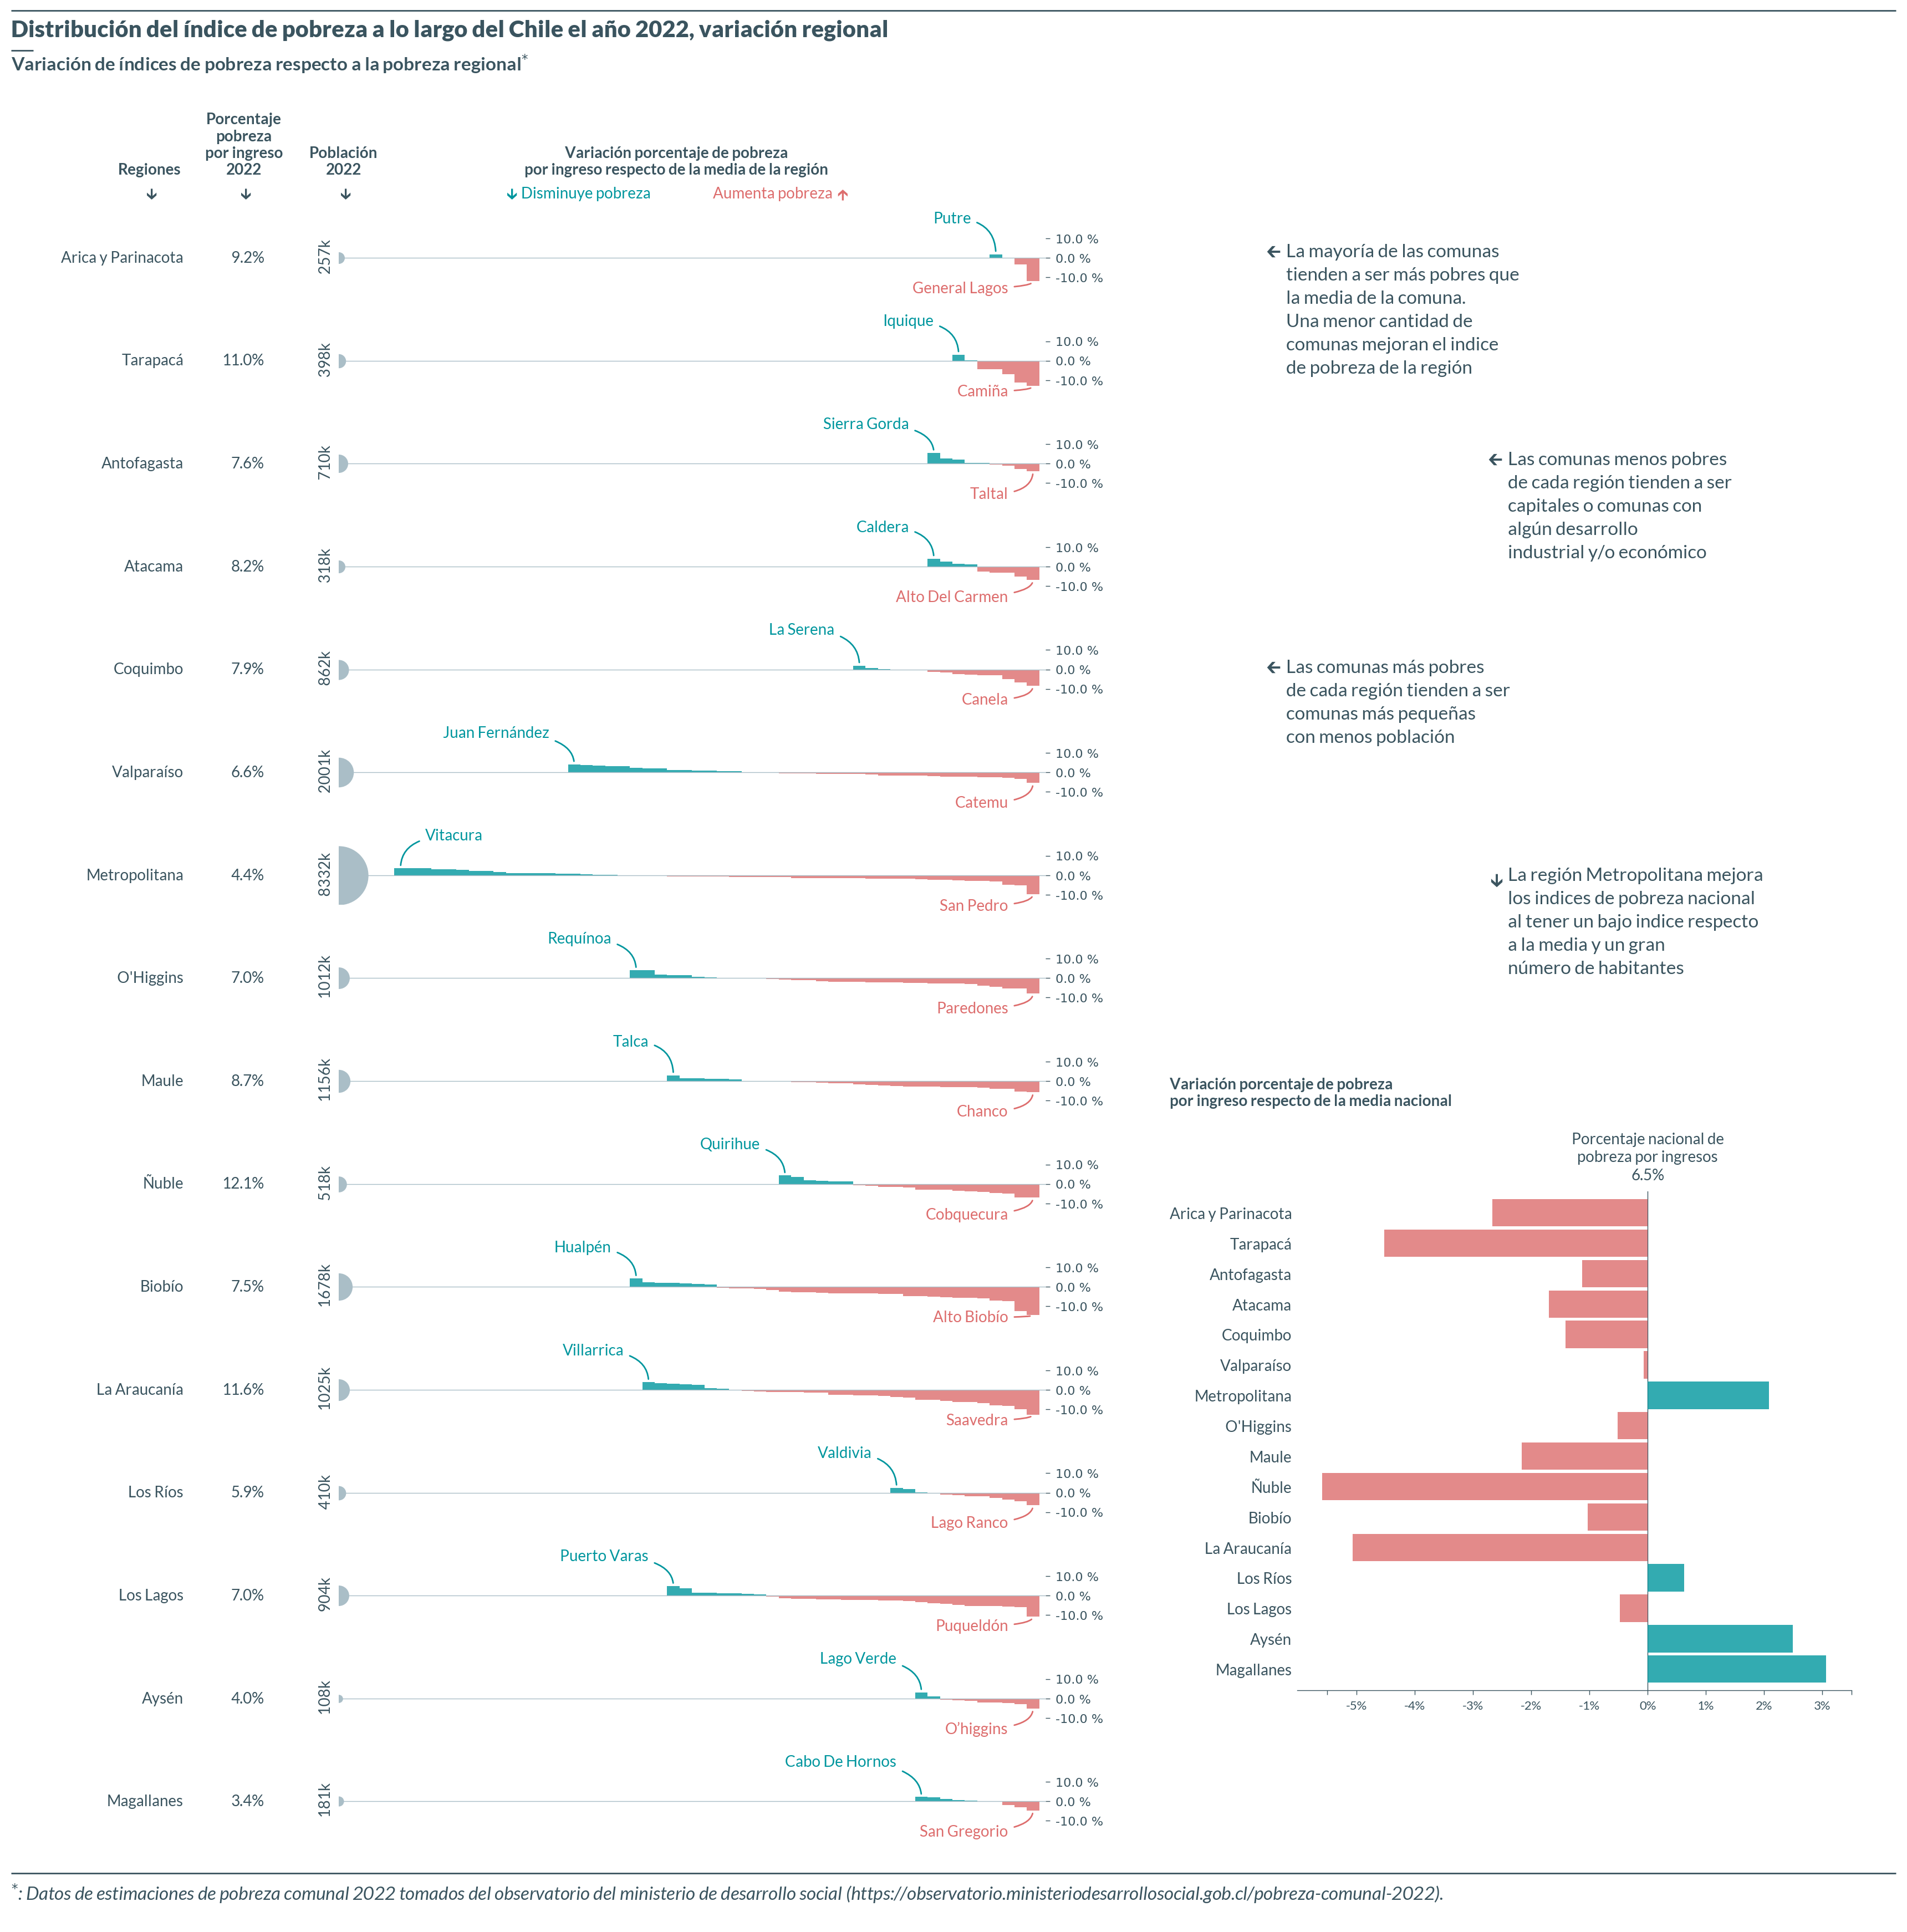

In [226]:
regiones_sort = {'Arica y Parinacota': 1, 'Tarapacá': 2, 'Antofagasta': 3, 'Atacama': 4, 'Coquimbo': 5, 'Valparaíso': 6, 'Metropolitana': 7, " O'Higgins": 8, 
                'Maule': 9, 'Ñuble': 10, 'Biobío': 11, 'La Araucanía': 12, 'Los Ríos': 13, 'Los Lagos': 14, 'Aysén': 15, 'Magallanes': 16}

df_merge['num_region'] = [17-regiones_sort[r] for r in df_merge.region]


fig, ax = plt.subplots(df_merge['region'].unique().shape[0], figsize=(10,15), dpi=200)

comunas_region_max = df_merge.groupby('region')['comuna'].count().max()
i=0
for r in df_merge.sort_values('num_region', ascending=False)['region'].unique():
    mean_region = df_merge[df_merge['region']==r]['personas_pobreza_por_ingresos'].sum() / df_merge[df_merge['region']==r]['poblacion'].sum()
    comunas_region_x = mean_region - df_merge.sort_values('porcentaje_pobreza_por_ingresos_2022', ascending=True)[df_merge['region']==r]['porcentaje_pobreza_por_ingresos_2022'].values
    shape_comuna = comunas_region_x.shape
    comunas_region_x = np.pad(comunas_region_x, (comunas_region_max - len(comunas_region_x), 0), mode='constant', constant_values=0)
    ax[i].bar(height=comunas_region_x, x=[j for j in range(comunas_region_max)], width=1, alpha=0.8,
            color=[colorSalmon if k<0 else colorGreen for k in comunas_region_x], zorder=1)
    ax[i].axhline(0, color=colorGray, linewidth=0.5)
    ax[i].set_xticks([])
    ax[i].set_ylim(-0.15, 0.15)
    ax[i].set_yticks([-0.10, 0, 0.10])
    ax[i].set_yticklabels(["-10.0 %", "0.0 %", "10.0 %"], fontsize=8)
    ax[i].set_xlim(-5, comunas_region_max)
    ax[i].yaxis.tick_right()
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_linewidth(0)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)

    ax[i].annotate(df_merge[df_merge['region']==r].loc[df_merge[df_merge['region']==r]['porcentaje_pobreza_por_ingresos_2022'].idxmax()].comuna, 
            xy=(51, comunas_region_x[-1]), xycoords='data', xytext=(49, -0.18), ha='right', textcoords='data', fontsize=10, 
            color=colorSalmon, fontproperties=prop_latoR, arrowprops=dict(arrowstyle='-', connectionstyle="angle3,angleA=0,angleB=-90", color=colorSalmon))

    if r=='Metropolitana':
        ax[i].annotate(df_merge[df_merge['region']==r].loc[df_merge[df_merge['region']==r]['porcentaje_pobreza_por_ingresos_2022'].idxmin()].comuna, 
                xy=(52 - shape_comuna[0], comunas_region_x[-shape_comuna[0]]), xycoords='data', xytext=(54 - shape_comuna[0], 0.18), ha='left', textcoords='data', fontsize=10, 
                color=colorGreen, fontproperties=prop_latoR, arrowprops=dict(arrowstyle='-', connectionstyle="angle3,angleA=0,angleB=-90", color=colorGreen))
    else:
        ax[i].annotate(df_merge[df_merge['region']==r].loc[df_merge[df_merge['region']==r]['porcentaje_pobreza_por_ingresos_2022'].idxmin()].comuna, 
                xy=(52 - shape_comuna[0], comunas_region_x[-shape_comuna[0]]), xycoords='data', xytext=(50 - shape_comuna[0], 0.18), ha='right', textcoords='data', fontsize=10, 
                color=colorGreen, fontproperties=prop_latoR, arrowprops=dict(arrowstyle='-', connectionstyle="angle3,angleA=0,angleB=-90", color=colorGreen))

    ax[i].tick_params(axis='y', direction='out', length=3, width=0.5, colors=colorGrayText, grid_color=colorGray, grid_alpha=0)
    pob_region = df_merge[df_merge['region']==r]['poblacion'].sum()

    ax[i].text(-17.5,0,f"{r}", ha='right', va='center', color=colorGrayText, fontproperties=prop_latoR, fontsize=10)
    ax[i].text(-11,0,f"{np.round(mean_region * 100, 1)}%", ha='right', va='center', color=colorGrayText, fontproperties=prop_latoR, fontsize=10)
    ax[i].scatter(-5,0, s=pob_region/6000, zorder=2, color=colorGray)
    ax[i].text(-6,0,f" {int(pob_region/1000)}k", ha='center', va='center', rotation=90, color=colorGrayText, fontproperties=prop_latoR, fontsize=10)
    i+=1

fig.text(0.125, 1.01,"Regiones", ha='center', va='bottom', color=colorGrayText, fontproperties=prop_latoB, fontsize=10)
fig.text(0.125, 1., "🡲", ha='center', va='center', fontsize=10, weight=900, color=colorGrayText, fontproperties=prop_noto2, rotation=-90)

fig.text(0.21, 1.01,"Porcentaje\npobreza\npor ingreso\n2022", ha='center', va='bottom', color=colorGrayText, fontproperties=prop_latoB, fontsize=10)
fig.text(0.21, 1., "🡲", ha='center', va='center', fontsize=10, weight=900, color=colorGrayText, fontproperties=prop_noto2, rotation=-90)

fig.text(0.30, 1.01,"Población\n2022", ha='center', va='bottom', color=colorGrayText, fontproperties=prop_latoB, fontsize=10)
fig.text(0.30, 1., "🡲", ha='center', va='center', fontsize=10, weight=900, color=colorGrayText, fontproperties=prop_noto2, rotation=-90)

fig.text(0.6, 1.01,"Variación porcentaje de pobreza\npor ingreso respecto de la media de la región", ha='center', va='bottom', color=colorGrayText, fontproperties=prop_latoB, fontsize=10)
fig.text(0.45, 1., "🡲", ha='center', va='center', fontsize=10, weight=900, color=colorGreen, fontproperties=prop_noto2, rotation=-90)
fig.text(0.46, 1.,"Disminuye pobreza", ha='left', va='center', color=colorGreen, fontproperties=prop_latoR, fontsize=10)

fig.text(0.751, 1., "🡲", ha='center', va='center', fontsize=10, weight=900, color=colorSalmon, fontproperties=prop_noto2, rotation=90)
fig.text(0.741, 1.,"Aumenta pobreza", ha='right', va='center', color=colorSalmon, fontproperties=prop_latoR, fontsize=10)

fig.text(1.045, 0.45,"Variación porcentaje de pobreza\npor ingreso respecto de la media nacional", ha='left', va='bottom', color=colorGrayText, fontproperties=prop_latoB, fontsize=10)
error_bar_draw(fig, [1.16, 0.1, 0.5, 0.3], df_merge)

# Anotaciones
fig.text(1.15, 0.97, "La mayoría de las comunas\ntienden a ser más pobres que\nla media de la comuna. \nUna menor cantidad de\ncomunas mejoran el indice\nde pobreza de la región", ha='left', va='top', 
            fontsize=12, weight=900, color=colorGrayText, fontproperties=prop_latoR, rotation=0, linespacing=1.5)
fig.text(1.15, 0.97, "🡰 ", ha='right', va='top', 
            fontsize=12, weight=900, color=colorGrayText, fontproperties=prop_noto2, rotation=0, linespacing=1.5)

fig.text(1.35, 0.845, "Las comunas menos pobres\nde cada región tienden a ser\ncapitales o comunas con\nalgún desarrollo\nindustrial y/o económico", ha='left', va='top', 
            fontsize=12, weight=900, color=colorGrayText, fontproperties=prop_latoR, rotation=0, linespacing=1.5)
fig.text(1.35, 0.845, "🡰 ", ha='right', va='top', 
            fontsize=12, weight=900, color=colorGrayText, fontproperties=prop_noto2, rotation=0, linespacing=1.5)

fig.text(1.15, 0.72, "Las comunas más pobres\nde cada región tienden a ser\ncomunas más pequeñas\ncon menos población", ha='left', va='top', 
            fontsize=12, weight=900, color=colorGrayText, fontproperties=prop_latoR, rotation=0, linespacing=1.5)
fig.text(1.15, 0.72, "🡰 ", ha='right', va='top', 
            fontsize=12, weight=900, color=colorGrayText, fontproperties=prop_noto2, rotation=0, linespacing=1.5)

fig.text(1.35, 0.595, "La región Metropolitana mejora\nlos indices de pobreza nacional\nal tener un bajo indice respecto\na la media y un gran\nnúmero de habitantes", ha='left', va='top', 
            fontsize=12, weight=900, color=colorGrayText, fontproperties=prop_latoR, rotation=0, linespacing=1.5)
fig.text(1.35, 0.595, "🡰 ", ha='right', va='top', 
            fontsize=12, weight=900, color=colorGrayText, fontproperties=prop_noto2, rotation=90, linespacing=1.5)

# Titulo
posx_line_title = [0., 1.7]
posy_line_title = [1.1+0.01, 1.1+0.01]
lw_line_title = 1
pos_x0_title = 0.
pos_y0_title = 1.095+0.01
title1_fig(fig, posx_line_title, posy_line_title, colorGrayText, colorGrayText,
        "Distribución del índice de pobreza a lo largo del Chile el año 2022, variación regional",
        lw_line_title, pos_x0_title, pos_y0_title, fontsize=15, fontproperties=prop_latoBlack)

# Sub-Titulo
posx_line_title = [0., 0.02]
posy_line_title = [pos_y0_title - 0.019, pos_y0_title - 0.019]
lw_line_title = 1
pos_x0_title = 0.
pos_y0_title = pos_y0_title - 0.0202
title1_fig(fig, posx_line_title, posy_line_title, colorGrayText, colorGrayText,
        "Variación de índices de pobreza respecto a la pobreza regional$^{*}$",
        lw_line_title, pos_x0_title, pos_y0_title, fontsize=12, fontproperties=prop_latoB)

# Pie pagina
posx_line_title = [0., 1.7]
posy_line_title = [-0.01, -0.01]
lw_line_title = 1
pos_x0_title = 0.
pos_y0_title = -0.015
title1_fig(fig, posx_line_title, posy_line_title, colorGrayText, colorGrayText,
        "$^{*}$: Datos de estimaciones de pobreza comunal 2022 tomados del observatorio del ministerio de desarrollo social (https://observatorio.ministeriodesarrollosocial.gob.cl/pobreza-comunal-2022).\n",
        lw_line_title, pos_x0_title, pos_y0_title, fontsize=12, fontproperties=prop_latoI)

plt.tight_layout()